# Assignment for Module - Machine Learning and Statistics
##### Author: Sheldon D'Souza G00387857

### Exploring the Scikit-Learn Library <sup>[1]</sup>

- What is Scikit-Learn
- Who uses it
- Why is it used
- What are the best uses cases
- What is the key functionality
- Examples of using key functionality

#### What is Scikit-Learn

Scikit-learn is a library within Python which can be used for supervised and/or unsupervised machine learning. The main advantges of using Scikit-learn are:
<li> It is simple to use and efficient</li>
<li>Built on numpy, scipy and matplotlib</li>
<li>Open source as well as commercially usable</li>

    

#### Choosing the right estimator: <sup>[2]</sup>

<img src="https://scikit-learn.org/stable/_static/ml_map.png" alt="When to Use Estiators" width="800"/>

### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
%matplotlib inline
randomstate = 1 #Provides consistent random data for training and testing. Set to 'None' if not needed

#### Classification Algorithms

##### Pima Indians Diabetes Database <i>(Predict the onset of diabetes based on diagnostic measures)</i> <sup>[3]</sup>

About the Dataset:

> Context
>
>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> Content
>
>The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



##### Importing the dataset

In [2]:
df = pd.read_csv('files\diabetes.csv', sep=',')

##### Exploring the dataset

In [3]:
# Getting the shape of the data

df.shape

(768, 9)

In [4]:
# Getting the first 5 records of the dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Getting the pedigree information of the data using the describe function:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Getting the datatypes and non-null count of the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check if there are NaN values in the dataframe (https://datatofish.com/check-nan-pandas-dataframe/)

df.isnull().values.any()

False

In [8]:
# Check and print how many Nil values each of the columns have

print("Pregnancies Nil Values:" ,"\t", df[df['Pregnancies']==0].shape[0])
print("Glucose Nil Values:", "\t\t", df[df['Glucose']==0].shape[0])
print("Blood Pressure Nil Values:" ,"\t", df[df['BloodPressure']==0].shape[0])
print("SkinThickness Nil Values:", "\t", df[df['SkinThickness']==0].shape[0])
print("Insulin Nil Values:", "\t\t", df[df['Insulin']==0].shape[0])
print("BMI Nil Values:", "\t\t", df[df['BMI']==0].shape[0])
print("DPFunction Nil Values:", "\t\t", df[df['DiabetesPedigreeFunction']==0].shape[0])
print("Age Nil Values:", "\t\t", df[df['Age']==0].shape[0])
print("Outcome Nil Values:", "\t\t", df[df['Outcome']==0].shape[0])


Pregnancies Nil Values: 	 111
Glucose Nil Values: 		 5
Blood Pressure Nil Values: 	 35
SkinThickness Nil Values: 	 227
Insulin Nil Values: 		 374
BMI Nil Values: 		 11
DPFunction Nil Values: 		 0
Age Nil Values: 		 0
Outcome Nil Values: 		 500


##### Comments and Observation regarding the Diabetes dataset:

- The diabetes dataset consists of 9 columns or fields of data and 768 records relating to diabetes observations. The details of each of the fields within the dataset including their datatype are as follows:

    1. ***Pregnancies:*** Number of pregnancies for women within the dataset - Integer
    2. ***Glucose:*** Plasma Glucose (2 hours) as part of  an oral glucose tolerance test - Integer
    3. ***BloodPressure:*** Diastollic Blood Pressure (mm hg) - Integer
    4. ***SkinThickness:*** Triceps skin fold thickness(mm) - Integer
    5. ***Insulin:*** 2 hour serum insulin(mu U/ml) - Integer
    6. ***BMI:*** Body Mass Index - Float
    7. ***Age:*** Age in number of years - Float
    8. ***DiabetesPedigreeFunction:*** likelihood of diabetes based on family history - Integer
    9. ***Outcome:*** Either 0 (patient does not have diabetes) or 1 (patient has diabetes) - Integer


- Although the dataset does not contain any NaN values, a number of columns have zero values within them. This is very obvious when using the describe function and a number of columns e.g. skinthickness and BMI have nil values which indicates that the data is incomplete for some records. An anlaysis of Nil records reveals that a number of columns have Nil values. Some of these have valid nil values such as Pregnancies and Outcome columns. However certain columns will need such has Glucose, Blood Pressurem Skinthickness, Insulin values and BMI have incomplete data for some of the records.

- We will need to clean the data before it is fit for purpose. One of the techniques which can be used while cleaning data is to substitute the Nil values with the Mean or the median value for the whole dataset. While this may be acceptable in certain circumstances, I felt that in case of Skin Thickness and Insulin, there were too many records for the substitutions with the mean to generate acceptable results and not taint the entire dataset. I therefore chose to drop or ignore these columns from the analysis.

- In case of columns where there we only a few records missing such as for Glucose, Blood Pressire and BMI, I substituted the mean or the median value for these missing records.


##### Cleaning the dataset

In [9]:
# Dropping the colummns where too many records were missing

df = df.drop(['SkinThickness', 'Insulin'], axis=1)

In [10]:
df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


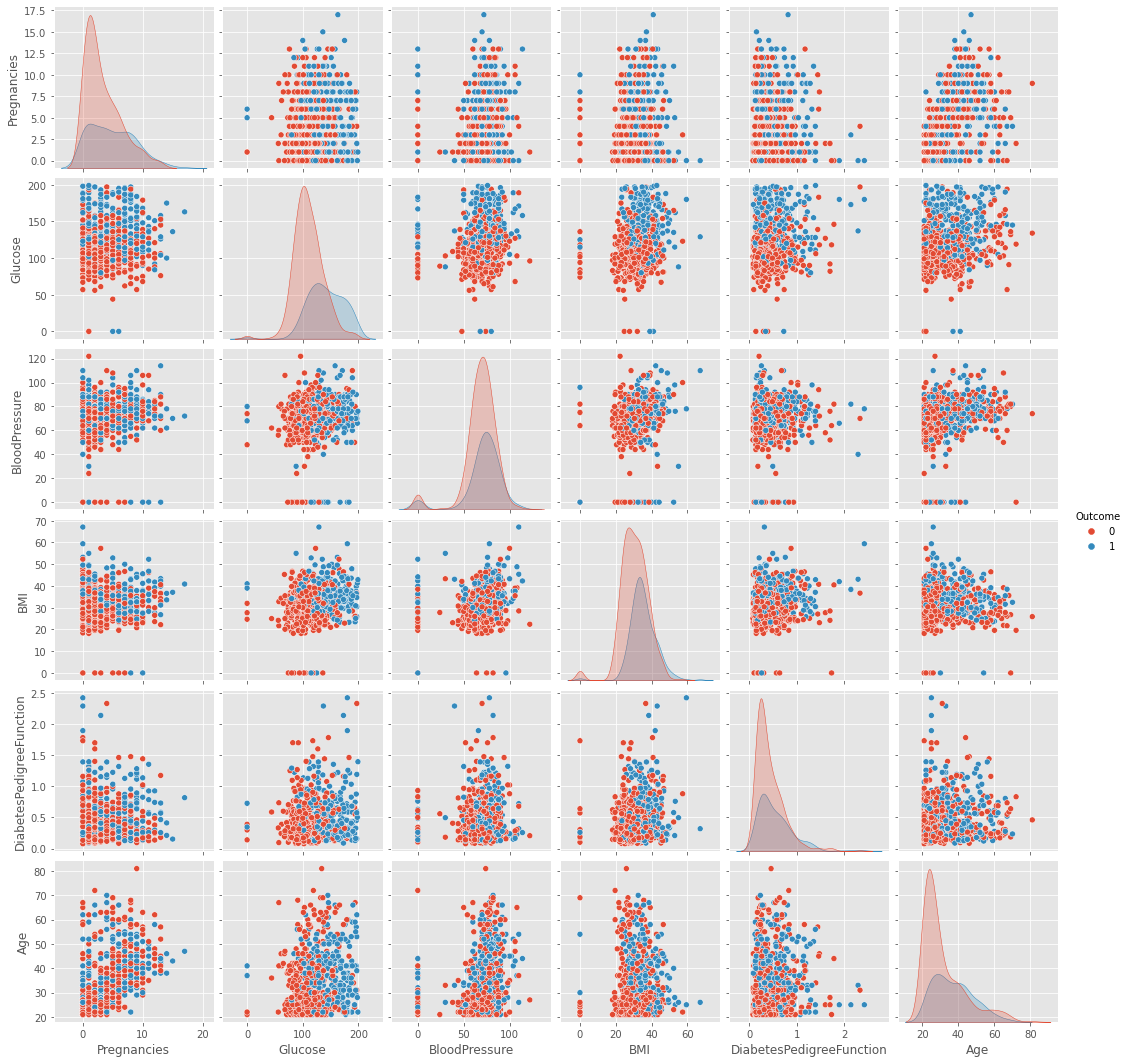

In [11]:
# Plotting a pairplot using Seaborn to see the relationships of the variable with each other as well as to see the distribution of the 
# data within each of the columns [5]

sns.pairplot(df, hue='Outcome', diag_kind='kde' )

In [12]:
#Substituting the column mean or median values for the remaining missing records
# Based on the kde distribition in the plots above I have taken the mean for the purposes of substitution as the data seems to
# be more or less normally distributed. This is of course a judgement call.

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())


In [13]:
# Re-check that the data now has no Nil values remaining

print("Glucose Nil Values:", "\t\t", df[df['Glucose']==0].shape[0])
print("Blood Pressure Nil Values:" ,"\t", df[df['BloodPressure']==0].shape[0])
print("BMI Nil Values:", "\t\t", df[df['BMI']==0].shape[0])
print("DPFunction Nil Values:", "\t\t", df[df['DiabetesPedigreeFunction']==0].shape[0])
print("Age Nil Values:", "\t\t", df[df['Age']==0].shape[0])

Glucose Nil Values: 		 0
Blood Pressure Nil Values: 	 0
BMI Nil Values: 		 0
DPFunction Nil Values: 		 0
Age Nil Values: 		 0


##### Analysis of the Dataset

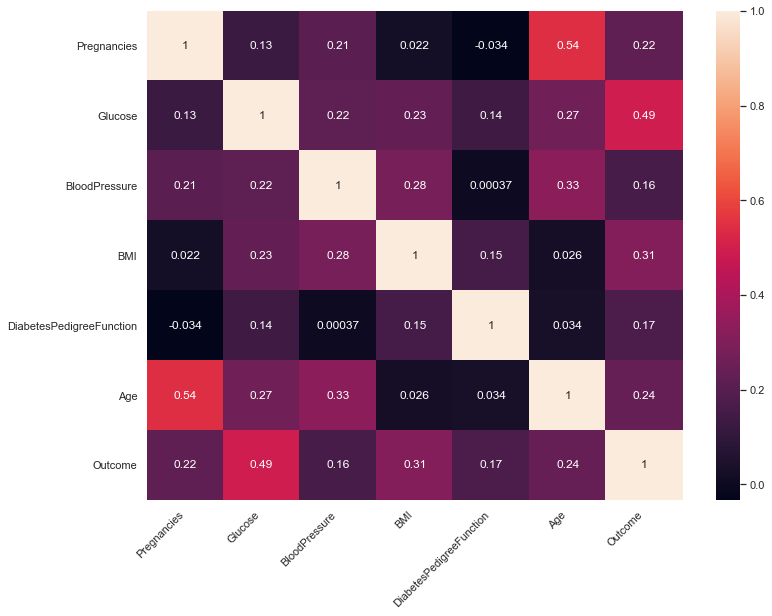

In [29]:
# Perfrom an analysis of the correlation between the variable and visualise through a Seaborn heatmap 

sns.set(rc={'figure.figsize':(12,9)}) #https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

df_corr = df.corr()

g = sns.heatmap(df_corr, annot=True)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right') #https://www.codegrepper.com/code-examples/whatever/rotate+the+x+labels+on+heatmap

plt.show()


In [30]:
df.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.281231,0.000371,0.326740,0.162986
BMI,0.021546,0.231478,0.281231,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.312254,0.173844,0.238356,1.000000


Analysis of the correlation heatmap and table:
- The above heatmap and the correlation tables show the correlation between each of the variables
- We can see that there is is relatively positive and higher correlaion between Glucose and Outcome (Diabetic or Not Diabetic), Age and Blood Pressure, BMI and Outcome. All these correlation are expected based on medical research. Greater Glucose levels and greater BMI have been documented to have a correlation to the higher risk of diabetes. It is also well documented that Blood Pressure increases with age.
- There is a high correlation between pregancies and age. This is an expected correlation and does not provide much insight as there it is to be expected that more pregancies mean a higher age.

In [28]:
# https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style-and-border-around-the-table-and-not-around-the-rows/

#df.style.set_table_styles([{'selector' : '','props' : [('border','2px solid green')]}])


df.groupby('Outcome').agg(['mean', 'median'])

Pregnancies            Glucose        BloodPressure               BMI  \
               mean median        mean median          mean median       mean   
Outcome                                                                         
0          3.298000      2  110.705367  107.5     70.810008   70.0  30.880066   
1          4.865672      4  142.159661  140.0     74.950326   74.0  35.381288   

               DiabetesPedigreeFunction               Age         
        median                     mean median       mean median  
Outcome                                                           
0        30.40                 0.429734  0.336  31.190000     27  
1        34.25                 0.550500  0.449  37.067164     36

We have analysed the means and medians of each of the independent variables grouped by the dependent variable i.e. the Outcome. We did this to establish the extent that each of the  independent variables had on the outcome.

Analysis of the data above:
- There was no signifcant differences between the means and median of each of the independent variables. Where there were differences the general trends of the median were similar to that of the mean (as discussed below).
- As expected the higher the level of Glucose the greater the skew towards a 'Diabetes' diagnosis. This makes sense as a higher level of glucose would either be a symptom of diabetes or would over time impair pancreatic function which would lead to diabetes.
- The average age for a person with a diabetic is around 7 years more than the average person without diabetes. Again this is expected as age would be a major contributing factor for the onset of diabetes
- The average number of pregancies for a diabetic individual seems to be around 4.9 as compared to 3.2 for non-diabetic individuals. Rather than a direct correlation between preganancies and diabetes, this would rather imply a correlation between age and preganancies (as in the more the age the more the pregancies).
- Average BMI and Blood pressure are also higher in the group with diabetes thatn the group without. However the difference does not seem significicant between the two groups. 

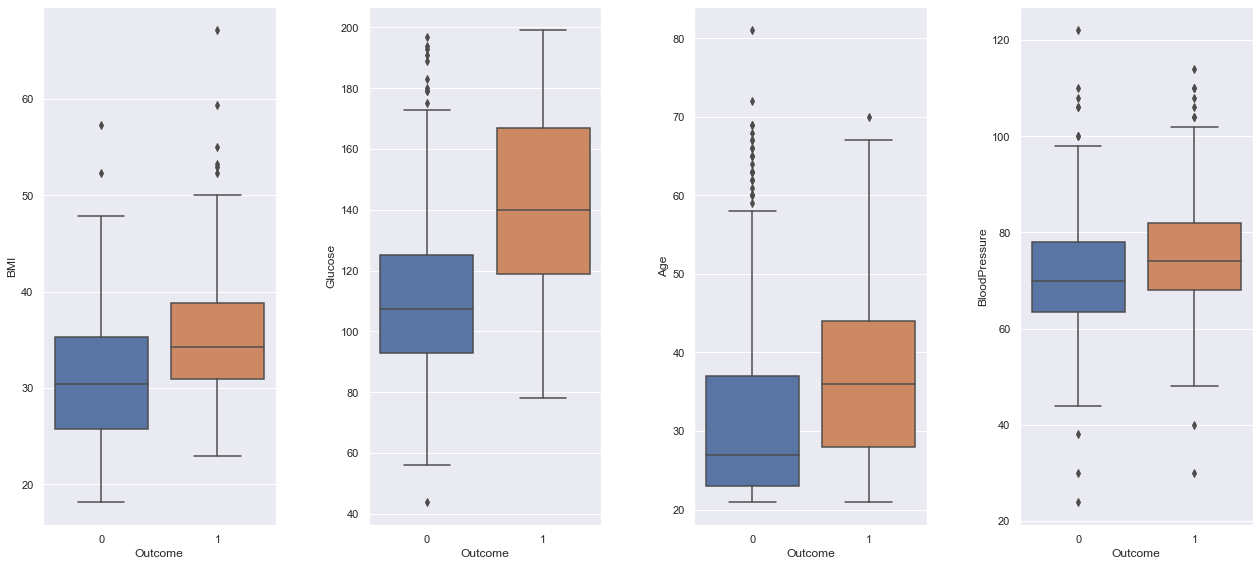

In [40]:
#https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn/38091681

fig, axs = plt.subplots(ncols=4)
sns.boxplot(x='Outcome', y='BMI', data=df, ax=axs[0])
sns.boxplot(x='Outcome', y='Glucose', data=df, ax=axs[1])
sns.boxplot(x='Outcome',y='Age', data=df, ax=axs[2])
sns.boxplot(x='Outcome',y='BloodPressure', data=df, ax=axs[3])


# https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

Analysis of Boxplots:

- We have analysed the data further to determine if there are any outliers. We have done this through the use of boxplots
- We can see that each of the correlations with Outcome, when plotted as boxplots show outliers
- This is mainly because while each of the independent variables potentially contribute towards the risk of diabetes, there will always be individuals who have higher markers but will be non-diabetic and vice versa.
- BMI/Outcome Oberservations - Within the Diabetic population there are a number of outliers with much higher BMI than the average in the group. This is contrasted with the Non-Diabetic population in which there are only a few outliers. This potenially shows that BMI is a good indication of Outcome for Non Diabetics i.e. a lower BMI is contrubutes significantly towards a more positive Outcome (i.e. non diabetic outcome)
- Glucose/Outcome Oberservations - While the average Glucose for non-diabetics is significantly lower than the diabetic population, the non-diabetic population also has a signifcant amount of outliers. These outliers relate to individuals with higer Glucose reading on a Glucose tolerance test but were non diabetic. It would be interesting to check the data on these individuals in a couple of years to see whether the outcome has changed. There were no signifcant outliers in the Diabetic population
- BMI/Outcome Oberservations - This category was very similar to the category above where there were a signficant amount outliers in the non-diabetic population in contrast to almost no outliers in the diabetic population. This potentially raises a question on whether the data gathered was skewed towards younger people which may also affect the outcome as generally, diabetes would not impact a younger population. We should look to weight the outcomes with the population bias if possible (may explore later)
- Blood Pressure /Outcome Oberservations - While both diabetic and non diabetic populations have outliers, generally the mean and the IRQs are within a tight range for both categories. The mean and IQRs for the diabetic group is much lower than that for the non diabetic group.  
- We have assumed that the none of the ouliers are due to collecting or calculation error and hence they were not excluded from the dataset.[https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba]

### References:

[1] - Scikit-Learn Library - https://scikit-learn.org/stable/

[2] - Choosing the right estimator - https://scikit-learn.org/stable/_static/ml_map.png

[3] - Pima Indians Diabetes Database - https://www.kaggle.com/uciml/pima-indians-diabetes-database

[4] - Basic Syntax Markdown Guide - https://www.markdownguide.org/basic-syntax/

[5] - Seaborn Home Page - https://seaborn.pydata.org/index.html